# Interpreting and Validating Clustering Results with K-Means  
by Alfonso Cervantes Barragan  
Data Scientist.

## Introduction


The purpose of this example is to demonstrate how to interpret and validate the results of a clustering algorithm. Clustering is an unsupervised learning technique used to group similar data points into clusters. After applying a clustering algorithm, it is essential to assess the quality of the clusters to ensure that they represent meaningful patterns in the data. This example uses the K-Means clustering algorithm and employs various visualization techniques and validation metrics to interpret and validate the clustering results. Additionally, we will use the elbow method to determine the optimal number of clusters.

In this example, I will use the Iris dataset for this demonstration because it is a well-known, simple, and small dataset that consists of three classes of iris plants. Each class contains 50 samples, making it ideal for clustering exercises and easy to visualize.


## Contents

1. [Import Libraries and Load Dataset](#import-libraries-and-load-dataset)
2. [Load and Standardize the Data](#load-and-standardize-the-data)
3. [Determine Optimal Number of Clusters Using the Elbow Method](#determine-optimal-number-of-clusters-using-the-elbow-method)
4. [Apply K-Means Clustering](#apply-k-means-clustering)
5. [Interpretation Using PCA](#interpretation-using-pca)
6. [Interpretation Using t-SNE](#interpretation-using-t-sne)
7. [Validation Metrics](#validation-metrics)
8. [Comparison with Known Labels](#comparison-with-known-labels)
9. [Online resources](#online_resources)


## Import Libraries and Load Dataset

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from scipy.spatial.distance import cdist



import warnings
warnings.filterwarnings('ignore')

#################### HANDLING WARNING ##############
##C:\Users\Proyecto\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: 
#UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there
#are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

import os

# Set the environment variable
os.environ['OMP_NUM_THREADS'] = '1'

################### HANDLING BUG in threadpoolctl#############
#!pip install --upgrade scikit-learn numpy threadpoolctl



**Definitions and Concepts**:
- **NumPy** : A library for numerical operations in Python, providing support for large, multi-dimensional arrays and matrices.
- **Pandas** : A library for data manipulation and analysis, offering data structures like DataFrame for handling tabular data.
- **Matplotlib** : A plotting library for creating static, animated, and interactive visualizations in Python.
- **Scikit-learn** : A machine learning library in Python that provides simple and efficient tools for data mining and data analysis.


## Load and Standardize the Data

In [6]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target  # Known labels for comparison

## Standardize the features

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Definitions and Concepts**:
- **Iris Dataset**: A classic dataset used in machine learning, containing 150 samples of iris flowers, each described by four features (sepal length, sepal width, petal length, petal width) and a target label (species of the flower). The dataset is widely used because of its simplicity and the clear distinction between the classes.
- **StandardScaler**: A preprocessing tool that standardizes features by removing the mean and scaling to unit variance. Standardization is important for many machine learning algorithms to perform well.


## KMEANS

K-Means is a widely used unsupervised learning algorithm designed to partition data into distinct groups, or clusters. It is one of the simplest and most popular clustering algorithms due to its efficiency and ease of implementation. The primary objective of K-Means is to organize a set of data points into 
𝐾
K clusters in such a way that points in the same cluster are more similar to each other than to those in other clusters.

### Determine Optimal Number of Clusters Using the Elbow Method

**Definitions and Concepts**:
- **Elbow Method**: A method used to determine the optimal number of clusters by plotting the inertia (sum of squared distances to the nearest cluster center) against the number of clusters. The "elbow" point on the plot indicates the optimal number of clusters.
- **Inertia**: A measure of how well the data points are clustered. Lower inertia means better clustering.

In [12]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

**Visualizing inertia vs number of clusters**

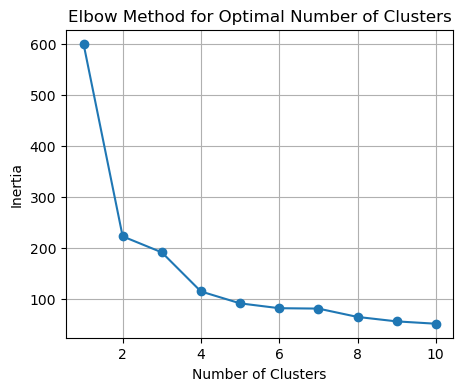

In [13]:
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

**Conclusions**:   
    The elbow plot shows a sharp decrease in inertia as the number of clusters increases from 1 to 3, indicating that adding more clusters significantly improves clustering quality up to this point. The "elbow" point, where the rate of decrease in inertia slows down, is observed at k = 3. Therefore, the optimal number of clusters for your dataset is likely 3, as this provides a good balance between cluster compactness and separation, minimizing within-cluster variance effectively.

### Apply K-Means Clustering

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

### Interpretation K-Means results Using PCA

Principal Component Analysis (PCA) is a powerful statistical technique used in data analysis and machine learning to reduce the dimensionality of datasets while preserving as much variability as possible. By transforming a large set of variables into a smaller one, PCA helps in simplifying the complexity of high-dimensional data, making it easier to visualize, analyze, and interpret.

n_components: The number of principal components to keep. Here, we set it to 2 for 2D visualization

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Visualizing the two PCA componentes**

**Observation**: By setting c=clusters, points belonging to the same cluster will have the same color, making it easier to visualize and distinguish the clusters.

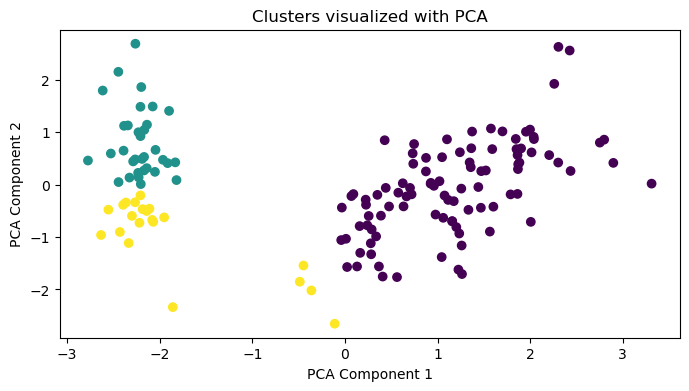

In [24]:
plt.figure(figsize=(8, 4))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

**Observations**   
1. The scatter plot shows three distinct clusters, indicating that the K-Means algorithm has successfully partitioned the data into three groups. The clusters are well-separated, with minimal overlap between them, suggesting a clear distinction among the data points.

2. Homogeneity Within Clusters: Each cluster appears to be relatively homogeneous, with points within the same cluster being close to each other. This indicates that the points in each cluster share similar characteristics.

The PCA scatter plot showed that the K-Means clustering algorithm has effectively grouped the data into three distinct clusters. The clusters are well-separated, indicating that the algorithm has identified meaningful patterns in the data. The use of PCA for dimensionality reduction has allowed for a clear and informative visualization of the clustering results, highlighting the homogeneity within clusters and the distinct differences between them

### 6. Interpretation Using t-SNE

t-SNE, or t-distributed Stochastic Neighbor Embedding, is a powerful and popular dimensionality reduction technique used primarily for the visualization of high-dimensional data

In [25]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

**Cluster visualization with t-SNE**

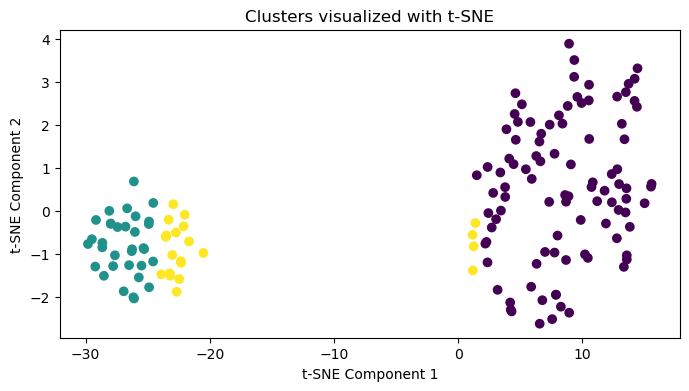

In [26]:

plt.figure(figsize=(8, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()

**Which are the differences between PCA and T-SNE?**

PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding) employ different methodologies for dimensionality reduction. 

PCA is a linear transformation technique that projects data onto a lower-dimensional subspace by maximizing variance. It identifies the principal components, which are the directions of maximum variance in the data, by calculating the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors with the largest eigenvalues are selected as the principal components, effectively capturing the most significant patterns in the data. 

On the other hand, t-SNE is a non-linear dimensionality reduction technique designed to capture the local structure of data by preserving pairwise distances between points. It achieves this by converting the pairwise Euclidean distances between high-dimensional data points into joint probabilities and then minimizing the Kullback-Leibler divergence between these joint probabilities in both the high-dimensional and low-dimensional spaces. This process helps to maintain the local relationships and clusters within the data, providing a more nuanced view of complex, non-linear structures.

### Validation Metrics

**Silhoutte Score**

The Silhouette Score is a metric used to evaluate the quality of a clustering algorithm, such as K-Means. It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where:  

    +1 indicates that the sample is far away from the neighboring clusters and very close to the cluster it is assigned to.
    0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
    -1 indicates that the sample might have been assigned to the wrong cluster, as it is closer to a neighboring cluster than to the cluster it is assigned to.

In [35]:
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.4798814508199817


**Conclusions**: 
A Silhouette Score of approximately 0.48 suggests moderate clustering quality. The value indicates that the data tends to be close to their centroid then to the cluster boundary, suggesting that the data points are relatively well-clustered but there is still room for improvement.

**Davies-Bouldin Index**

The Davies-Bouldin Index (DBI) is a metric used to evaluate the quality of clustering algorithms. It measures the average similarity ratio of each cluster with its most similar cluster, taking into account both intra-cluster similarity (compactness) and inter-cluster difference (separation). Lower values of the Davies-Bouldin Index indicate better clustering quality.

The Davies-Bouldin Index is calculated using the following formula:

$$ \text{DBI} = \frac{1}{n} \sum_{i=1}^{n} \max_{j \neq i} \left( \frac{S_i + S_j}{M_{ij}} \right) $$

where:
- $ n $ is the number of clusters.
- $ S_i $ is the average distance between each point in cluster $ i $ and the centroid of cluster $ i $ (a measure of cluster compactness).
- $ M_{ij} $ is the distance between the centroids of clusters $ i $ and $ j $ (a measure of cluster separation).


In [36]:
db_score = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.7893630242997912


**Conclusions**: A Davies-Bouldin Index of approximately 0.79 indicates good clustering quality. Lower DBI values are desirable, and in this context, a value below 1 suggests that the clusters are well-separated and compact.

**Calinski-Harabasz Index**

The Calinski-Harabasz Index is a valuable metric for assessing the quality of clustering. It balances the compactness and separation of clusters, providing a single value that indicates how well the data points are grouped into distinct clusters. By maximizing the between-cluster dispersion and minimizing the within-cluster dispersion, the Calinski-Harabasz Index helps in selecting the optimal number of clusters and evaluating the performance of different clustering algorithmsk.

The Calinski-Harabasz Index \(CH\) is defined as:

$$ \text{CH} = \frac{\text{trace}(B_k) / (k - 1)}{\text{trace}(W_k) / (n - k)} $$

where:
- $ k $ is the number of clusters.
- $ n $ is the number of data points.
- $\text{trace}(B_k) $ is the trace of the between-cluster dispersion matrix.
- $\text{trace}(W_k)$ is the trace of the within-cluster dispersion matrix.

#### Between-Cluster Dispersion Matrix (\(B_k\))

The between-cluster dispersion matrix measures the dispersion of the cluster centroids relative to the global centroid of the dataset. It captures how spread out the clusters are from each other. Mathematically, it is defined as:

$$ B_k = \sum_{i=1}^{k} n_i (\mu_i - \mu)(\mu_i - \mu)^T $$

where:
- $ \mu_i $ is the centroid of cluster $i$.
- $ \mu $ is the global centroid of the dataset.
- $ n_i $ is the number of points in cluster $i$.

#### Within-Cluster Dispersion Matrix ($W_k$)

The within-cluster dispersion matrix measures the dispersion of the data points within each cluster relative to their respective cluster centroids. It captures how tightly the data points are packed within each cluster. Mathematically, it is defined as:

$$ W_k = \sum_{i=1}^{k} \sum_{x \in C_i} (x - \mu_i)(x - \mu_i)^T $$

where:
- $ x $ is a data point.
- $ C_i $ is cluster $i$.
- $ \mu_i $ is the centroid of cluster $i $.

In [46]:
ch_score = calinski_harabasz_score(X_scaled, clusters)
print(f"Calinski-Harabasz Index: {ch_score}")


Calinski-Harabasz Index: 157.36015312192248


**Conclusions**: The value 157.36 is relatively high, which indicates that the clusters formed by the clustering algorithm (in this case, K-Means) are well-defined. The clusters are compact and separated, meaning that the data points within each cluster are close to each other, and the different clusters are well-separated from each other.

**Adjusted Rand Index**  

The Adjusted Rand Index (ARI) is a measure used to evaluate the similarity between two data clusterings. It is an adjustment of the Rand Index (RI), which counts the number of pairs of elements that are either both in the same cluster or both in different clusters in the predicted and true clusterings. The ARI adjusts for the chance grouping of elements, providing a more accurate measure of clustering similarity.

The ARI adjusts the RI by considering the expected similarity of all pairwise comparisons based on chance. This adjustment makes the ARI more reliable and interpretable, especially when comparing different clustering results.

#### Formula
The ARI is given by the formula:

$$ \text{ARI} = \frac{\text{RI} - \text{Expected RI}}{\max(\text{RI}) - \text{Expected RI}} $$

Where:
- **RI** is the Rand Index.
- **Expected RI** is the expected value of the Rand Index if the clustering was random.
- **max(RI)** is the maximum value the Rand Index can take, which is 1.

#### Interpretation
The ARI score ranges from -1 to 1:
- **1**: Perfect agreement between the two clusterings (the predicted clustering is exactly the same as the true clustering).
- **0**: The clustering is no better than random assignment.
- **Negative values**: The clustering is worse than random assignment, indicating significant disagreement between the two clusterings.


In [47]:
ari_score = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari_score}")


Adjusted Rand Index: 0.432804702527474


An ARI score of 0.432804702527474 suggests a moderate level of agreement between the clustering results and the ground truth. While it is better than random assignment (which would be around 0), it is not close to perfect agreement (which would be 1).

**Fowlkes-Mallows Index**  

The Fowlkes-Mallows Index (FMI) is a measure used to evaluate the similarity between two clusterings. It compares the agreement between the clusters produced by a clustering algorithm and the ground truth labels. The FMI is particularly useful for assessing the quality of clustering results.

#### Calculation
To compute the Fowlkes-Mallows Index, follow these steps:

1. **Define Pairwise Classifications**:
   - **True Positive (TP)**: Number of pairs of points that are in the same cluster in both the predicted and true clusterings.
   - **False Positive (FP)**: Number of pairs of points that are in the same cluster in the predicted clustering but in different clusters in the true clustering.
   - **False Negative (FN)**: Number of pairs of points that are in different clusters in the predicted clustering but in the same cluster in the true clustering.

2. **Compute Precision and Recall**:
   - **Precision**: The fraction of true positive pairs out of all pairs that are in the same cluster in the predicted clustering.
     $$
     \text{Precision} = \frac{TP}{TP + FP}
     $$
   - **Recall**: The fraction of true positive pairs out of all pairs that are in the same cluster in the true clustering.
     $$
     \text{Recall} = \frac{TP}{TP + FN}
     $$

3. **Calculate the Fowlkes-Mallows Index**:
   - The FMI is the geometric mean of precision and recall:
     $$
     \text{Fowlkes-Mallows Index} = \sqrt{\text{Precision} \times \text{Recall}}
     $$

#### Interpretation
The Fowlkes-Mallows Index ranges from 0 to 1:
- **1**: Perfect agreement between the predicted clustering and the true clustering.
- **0**: No agreement between the predicted clustering and the true clustering.



In [42]:
fmi_score = fowlkes_mallows_score(y, clusters)
print(f"Fowlkes-Mallows Index: {fmi_score}")


Fowlkes-Mallows Index: 0.6640227694665429


**Conclusions**: An FMI value of approximately 0.664 suggests that there is a moderate to high level of agreement between the clusters identified by the clustering algorithm and the actual clusters. While it is not perfect, it shows that the clustering algorithm has done a fairly good job of grouping the data points in a way that aligns with the ground truth.

**Within-Cluster Sum of Squares (WCSS)**

The Within-Cluster Sum of Squares (WCSS) is a metric used to evaluate the compactness of clusters in clustering algorithms, such as k-means. It measures the sum of squared distances between each data point and the centroid of its assigned cluster. The WCSS helps to determine how well the clusters are formed.

WCSS is calculated as the sum of the squared distances between each data point and the centroid of the cluster it belongs to. Mathematically, it is expressed as:

$$ \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2 $$

Where:
- $ k $ is the number of clusters.
- $ C_i $ is the $ i $-th cluster.
- $ x $ represents each data point in cluster $ C_i $.
- $ \mu_i $ is the centroid of cluster $ C_i $.
- $ \| x - \mu_i \|^2 $ is the squared Euclidean distance between data point $ x $ and centroid $ \mu_i $.

#### Interpretation

- **Low WCSS**: Indicates that data points are close to their cluster centroids, suggesting that the clusters are compact and well-formed.
- **High WCSS**: Indicates that data points are spread out from their cluster centroids, suggesting that the clusters are not well-formed.



In [48]:
wcss = kmeans.inertia_
print(f"Within-Cluster Sum of Squares (WCSS): {wcss}")


Within-Cluster Sum of Squares (WCSS): 191.02473685317966


**Conclusions**: The value of 191.02473685317966, by itself, doesn’t convey much unless you compare it with WCSS values for different numbers of clusters (k) or for different clustering solutions.  

The elbow point, the point where the WCSS value starts to flatten out (the elbow point), suggests a balance between the number of clusters and the cluster compactness. Because of  191.02473685317966 being the WCSS value at this elbow point with three cluster, it indicates that this number of clusters provides a good trade-off between complexity and compactness.

### Comparison with Known Labels

**Definitions and Concepts**:
**True Labels**: The actual class labels of the data points. In this example, the true labels are the species of the iris flowers.


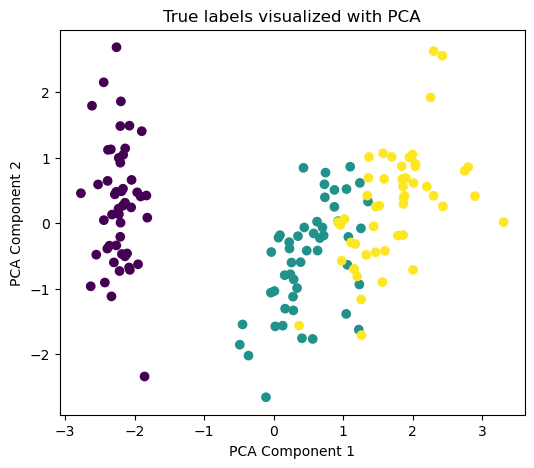

In [34]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("True labels visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

**Conclusions**: 
1. The purple cluster is clearly separated from the teal and yellow clusters, indicating that this group of points is distinct from the others.
2. There is some overlap between the teal and yellow clusters, suggesting that these two groups have more similarities or that the features used for PCA may not completely distinguish between these classes.


### Online Resources

1. **Scikit-Learn Documentation**:
   - [Clustering](https://scikit-learn.org/stable/modules/clustering.html)
     - The Scikit-Learn documentation provides detailed information on clustering algorithms, including K-Means, and examples of how to use them in Python.

2. **Towards Data Science**:
   - [The 5 Clustering Algorithms Data Scientists Need to Know](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)
     - This article provides an overview of various clustering algorithms, including K-Means, and their applications.

3. **Analytics Vidhya**:
   - [Introduction to K-Means Clustering in Python with scikit-learn](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)
     - A step-by-step guide to implementing K-Means clustering in Python with Scikit-Learn, including interpretation and validation techniques.